<파이썬에서 이미지 저장 경로 변경하는 방법>

*코드 상단에 붙여넣기*
 import os
    os.chdir('C:/Users/create/DV')

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [2]:
plt.rc('font', family='Malgun Gothic')   # 폰트 꼭 설정

In [3]:
import warnings   #가까운 미래에 더 이상 지원하지 않는 기능에 대한 경고성 메시지를 없애기 위해 warnings 모듈 임포트
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

CHART_NAME = 'seabornWelfare'
cnt, PNG, UNDERBAR = 0, '.png', '_'

filename = 'C:/Users/create/DV/welfare_python.csv'

In [5]:
import pandas as pd
welfare = pd.read_csv(filename, encoding='utf-8')

print(welfare.columns)

Index(['gender', 'birth', 'marriage', 'religion', 'code_job', 'income',
       'code_religion'],
      dtype='object')


In [6]:
### 데이터 전처리 ###############################################################

welfare.loc[welfare['gender'] == 1 , ['gender']] = '남성'
welfare.loc[welfare['gender'] == 2 , ['gender']] = '여성'

print("") ; print("<Gender 변경>")
print(welfare)


<Gender 변경>
      gender  birth  marriage  religion  code_job  income  code_religion
0         여성   1936         2         2       NaN     NaN              1
1         여성   1945         2         2       NaN     NaN              1
2         남성   1948         2         2     942.0   120.0              1
3         남성   1942         3         1     762.0   200.0              1
4         여성   1923         2         1       NaN     NaN              1
...      ...    ...       ...       ...       ...     ...            ...
16659     여성   1967         1         1       NaN     NaN              5
16660     여성   1992         5         1     314.0   302.5              5
16661     남성   1995         5         1       NaN     NaN              5
16662     여성   1998         0         1       NaN     NaN              5
16663     남성   2001         0         1       NaN     NaN              5

[16664 rows x 7 columns]


In [7]:
print('\n# 나이 컬럼은 존재하지 않으므로 생일 컬럼을 이용하여 산술 연산합니다.')
thisyear = 2021
welfare['age'] = thisyear - welfare['birth'] + 1   # age 컬럼 추가

print("") ; print("<age 컬럼 추가>") 
print(welfare)


# 나이 컬럼은 존재하지 않으므로 생일 컬럼을 이용하여 산술 연산합니다.

<age 컬럼 추가>
      gender  birth  marriage  religion  code_job  income  code_religion  age
0         여성   1936         2         2       NaN     NaN              1   86
1         여성   1945         2         2       NaN     NaN              1   77
2         남성   1948         2         2     942.0   120.0              1   74
3         남성   1942         3         1     762.0   200.0              1   80
4         여성   1923         2         1       NaN     NaN              1   99
...      ...    ...       ...       ...       ...     ...            ...  ...
16659     여성   1967         1         1       NaN     NaN              5   55
16660     여성   1992         5         1     314.0   302.5              5   30
16661     남성   1995         5         1       NaN     NaN              5   27
16662     여성   1998         0         1       NaN     NaN              5   24
16663     남성   2001         0         1       NaN     NaN              5   21

[16664 r

In [8]:
def setMarriage( x ):
    if x == 1 :
        return '결혼'
    elif x == 3 :
        return '이혼'
    else :
        return '무응답' # 결측치

In [9]:
# 결혼 : 숫자 1이면 결혼, 3이면 이혼, 이외에는 결측치로 처리
welfare['marriage'] = welfare['marriage'].apply(setMarriage)

In [10]:
print("") ; print("<marriage 변경>")
print(welfare)


<marriage 변경>
      gender  birth marriage  religion  code_job  income  code_religion  age
0         여성   1936      무응답         2       NaN     NaN              1   86
1         여성   1945      무응답         2       NaN     NaN              1   77
2         남성   1948      무응답         2     942.0   120.0              1   74
3         남성   1942       이혼         1     762.0   200.0              1   80
4         여성   1923      무응답         1       NaN     NaN              1   99
...      ...    ...      ...       ...       ...     ...            ...  ...
16659     여성   1967       결혼         1       NaN     NaN              5   55
16660     여성   1992      무응답         1     314.0   302.5              5   30
16661     남성   1995      무응답         1       NaN     NaN              5   27
16662     여성   1998      무응답         1       NaN     NaN              5   24
16663     남성   2001      무응답         1       NaN     NaN              5   21

[16664 rows x 8 columns]


In [11]:
print('\n# 월급 결측치 개수 구하기 before')
print(sum(welfare['income'].isnull()))


# 월급 결측치 개수 구하기 before
12030


In [12]:
welfare.loc[welfare['income'].isnull(), 'income'] = welfare['income'].mean()

print('\n# 월급 결측치 개수 구하기 after')
print(sum(welfare['income'].isnull()))


# 월급 결측치 개수 구하기 after
0


In [13]:
print("") ; print("<income 변경>")
print(welfare)


<income 변경>
      gender  birth marriage  religion  code_job      income  code_religion  \
0         여성   1936      무응답         2       NaN  241.619016              1   
1         여성   1945      무응답         2       NaN  241.619016              1   
2         남성   1948      무응답         2     942.0  120.000000              1   
3         남성   1942       이혼         1     762.0  200.000000              1   
4         여성   1923      무응답         1       NaN  241.619016              1   
...      ...    ...      ...       ...       ...         ...            ...   
16659     여성   1967       결혼         1       NaN  241.619016              5   
16660     여성   1992      무응답         1     314.0  302.500000              5   
16661     남성   1995      무응답         1       NaN  241.619016              5   
16662     여성   1998      무응답         1       NaN  241.619016              5   
16663     남성   2001      무응답         1       NaN  241.619016              5   

       age  
0       86  
1       77  

In [14]:
def setReligion_txt( x ):
    if int(x) == 1 :
        return '있슴'
    else :
        return '없슴'

In [15]:
print("welfare['religion'].unique()")
print(welfare['religion'].unique())   #  해당 컬럼의 항목 종류들 출력

welfare['religion'].unique()
[2 1]


In [16]:
welfare['religion'] = welfare['religion'].apply(setReligion_txt)

print("") ; print("<religion 변경>")   #업슴/잇습으로
print(welfare)


<religion 변경>
      gender  birth marriage religion  code_job      income  code_religion  \
0         여성   1936      무응답       없슴       NaN  241.619016              1   
1         여성   1945      무응답       없슴       NaN  241.619016              1   
2         남성   1948      무응답       없슴     942.0  120.000000              1   
3         남성   1942       이혼       있슴     762.0  200.000000              1   
4         여성   1923      무응답       있슴       NaN  241.619016              1   
...      ...    ...      ...      ...       ...         ...            ...   
16659     여성   1967       결혼       있슴       NaN  241.619016              5   
16660     여성   1992      무응답       있슴     314.0  302.500000              5   
16661     남성   1995      무응답       있슴       NaN  241.619016              5   
16662     여성   1998      무응답       있슴       NaN  241.619016              5   
16663     남성   2001      무응답       있슴       NaN  241.619016              5   

       age  
0       86  
1       77  
2       7

In [17]:
job_file = 'C:/Users/create/DV/welfare_job.csv'
jobframe = pd.read_csv(job_file, encoding='cp949')

In [18]:
jobframe

,code_job,job
0,111,의회의원 고위공무원 및 공공단체임원
1,112,기업고위임원
2,120,행정 및 경영지원 관리자
3,131,연구 교육 및 법률 관련 관리자
4,132,보험 및 금융 관리자
...,...,...
144,991,농립어업관련 단순 종사원
145,992,계기검침 수금 및 주차 관련 종사원
146,999,기타 서비스관련 단순 종사원
147,1011,장교


In [19]:
print("welfare['code_job'].unique()")
print(welfare['code_job'].unique())

welfare['code_job'].unique()
[  nan  942.  762.  530.  999.  312.  254.  510.  286.  521.  773.  314.
  941.  951.  274.  873.  320.  952.  151.  152.  772.  852.  442.  991.
  422.  313.  710.  522.  399.  753.  851.  235.  231.  311.  721.  953.
  930.  863.  910.  392.  761.  922.  285.  875.  862.  421.  243.  223.
  252.  259.  771.  135.  245.  221.  751.  251.  141.  722.  246.  289.
  281.  741.  261.  247.  441.  864.  222.  411.  799.  743.  780.  149.
  891.  823.  159.  248.  874.  892.  241.  239.  791.  271.  871.  391.
  620.  131.  431.  811.  272.  429.  213.  842.  283.  284.  134.  611.
  236.  792.  855.  234.  861.  921.  253.  752.  841.  330.  233.  899.
  139.  432.  212.  423.  730.  273.  211.  412.  120.  992.  854.  822.
  831.  853.  832.  612.  821.  613.  774.  132. 1011.  237.  153.  133.
  224.  882.  242.  244.  232.  630.  742.  843. 1012.  881.  812.  819.
  111.  876.]


In [20]:
print('\n# merge() 함수의 left_on과 right_on 사용하기')
welfare = pd.merge( welfare, jobframe, left_on='code_job', right_on='code_job')  # 두 데이터를 병합
print(welfare)  # job컬럼 생성


# merge() 함수의 left_on과 right_on 사용하기
     gender  birth marriage religion  code_job       income  code_religion  \
0        남성   1948      무응답       없슴     942.0   120.000000              1   
1        남성   1945       이혼       없슴     942.0   220.200000              1   
2        남성   1946       결혼       없슴     942.0   139.000000              1   
3        남성   1953       결혼       없슴     942.0   150.000000              1   
4        남성   1960       결혼       있슴     942.0   166.000000              1   
...     ...    ...      ...      ...       ...          ...            ...   
7524     여성   1950       결혼       있슴     819.0   241.619016              6   
7525     남성   1960       결혼       있슴     111.0   250.000000              7   
7526     남성   1960       결혼       없슴     111.0  1250.000000              1   
7527     남성   1992      무응답       있슴     876.0   280.000000              3   
7528     남성   1935       결혼       있슴     876.0   156.000000              3   

      age                

In [21]:
print("welfare['code_religion'].unique()")
print(welfare['code_religion'].unique())

welfare['code_religion'].unique()
[1 2 3 4 7 5 6]


In [22]:
def setReligion_txt( x ):
    if int(x) == 1 :
        return '서울'
    elif int(x) == 2 :
        return '수도권'
    elif int(x) == 3:
        return '부산/경남/울산'
    elif int(x) == 4 :
        return '대구/경북'
    elif int(x) == 5 :
        return '대전/충남'
    elif int(x) == 6 :
        return '강원/충북'
    elif int(x) == 7 :
        return '광주/전남/전북/제주도'

In [23]:
welfare['code_religion'] = welfare['code_religion'].apply(setReligion_txt)    # apply(x): x함수 적용

print("") ; print("<code_religion 변경>")
print(welfare)


<code_religion 변경>
     gender  birth marriage religion  code_job       income code_religion  \
0        남성   1948      무응답       없슴     942.0   120.000000            서울   
1        남성   1945       이혼       없슴     942.0   220.200000            서울   
2        남성   1946       결혼       없슴     942.0   139.000000            서울   
3        남성   1953       결혼       없슴     942.0   150.000000            서울   
4        남성   1960       결혼       있슴     942.0   166.000000            서울   
...     ...    ...      ...      ...       ...          ...           ...   
7524     여성   1950       결혼       있슴     819.0   241.619016         강원/충북   
7525     남성   1960       결혼       있슴     111.0   250.000000  광주/전남/전북/제주도   
7526     남성   1960       결혼       없슴     111.0  1250.000000            서울   
7527     남성   1992      무응답       있슴     876.0   280.000000      부산/경남/울산   
7528     남성   1935       결혼       있슴     876.0   156.000000      부산/경남/울산   

      age                  job  
0      74            경

In [24]:
# 청년_young(30세 미만), 중년_middle(30세 이상), 노년_old(60세 이상)
def newAge(x):
    if x < 30:
        return '청년'
    elif x >= 30 and x < 60:
        return '중년'
    else :
        return '노년'

In [25]:
welfare['ageg'] = welfare['age'].apply(newAge)

print(welfare[['age', 'ageg']].head())

############################## 전처리 완료됨 #############

   age ageg
0   74   노년
1   77   노년
2   76   노년
3   69   노년
4   62   노년


In [26]:
welfare

,gender,birth,marriage,religion,code_job,income,code_religion,age,job,ageg
0,남성,1948,무응답,없슴,942.0,120.000000,서울,74,경비원 및 검표원,노년
1,남성,1945,이혼,없슴,942.0,220.200000,서울,77,경비원 및 검표원,노년
2,남성,1946,결혼,없슴,942.0,139.000000,서울,76,경비원 및 검표원,노년
3,남성,1953,결혼,없슴,942.0,150.000000,서울,69,경비원 및 검표원,노년
4,남성,1960,결혼,있슴,942.0,166.000000,서울,62,경비원 및 검표원,노년
...,...,...,...,...,...,...,...,...,...,...
7524,여성,1950,결혼,있슴,819.0,241.619016,강원/충북,72,기타 식품가공관련 기계조작원,노년
7525,남성,1960,결혼,있슴,111.0,250.000000,광주/전남/전북/제주도,62,의회의원 고위공무원 및 공공단체임원,노년
7526,남성,1960,결혼,없슴,111.0,1250.000000,서울,62,의회의원 고위공무원 및 공공단체임원,노년
7527,남성,1992,무응답,있슴,876.0,280.000000,부산/경남/울산,30,선박 갑판승무원 및 관련 종사원,중년


In [27]:
#모든 컬럼들이 영문으로 되어 있어 직관력이 떨어지므로, 모든 컬럼들을 '한글' 이름으로 변경

In [28]:
col_mapping = {'gender':'성별', 'birth':'생일', 'marriage':'결혼 유무', 'religion':'종교 유무', 'code_job':'직업 코드', 'income':'소득', 'code_religion':'지역구', 'age':'나이', 'job':'직업', 'ageg':'연령대'}
welfare = welfare.rename(columns = col_mapping)  # pandas 데이터프레임의  rename 메소드에 columns 매개변수 이용하여 변경

welfare.to_csv('welfareClean.csv', index=False, encoding='cp949')

In [29]:
print(welfare.head(10))

   성별    생일 결혼 유무 종교 유무  직업 코드          소득  지역구  나이         직업 연령대
0  남성  1948   무응답    없슴  942.0  120.000000   서울  74  경비원 및 검표원  노년
1  남성  1945    이혼    없슴  942.0  220.200000   서울  77  경비원 및 검표원  노년
2  남성  1946    결혼    없슴  942.0  139.000000   서울  76  경비원 및 검표원  노년
3  남성  1953    결혼    없슴  942.0  150.000000   서울  69  경비원 및 검표원  노년
4  남성  1960    결혼    있슴  942.0  166.000000   서울  62  경비원 및 검표원  노년
5  남성  1939    결혼    있슴  942.0  241.619016   서울  83  경비원 및 검표원  노년
6  남성  1947    결혼    있슴  942.0  150.000000  수도권  75  경비원 및 검표원  노년
7  남성  1952    이혼    없슴  942.0  170.000000   서울  70  경비원 및 검표원  노년
8  남성  1949    결혼    있슴  942.0  100.000000   서울  73  경비원 및 검표원  노년
9  남성  1942    결혼    있슴  942.0  120.000000   서울  80  경비원 및 검표원  노년


In [30]:
############################ 컬럼 이름 한글로 변경 완료 ###################

In [31]:
######### 여기까지 8주차 내용

In [32]:
##9주차 시작

## 나이와 소득에 따른 산점도와 히스토그램 (jointplot)

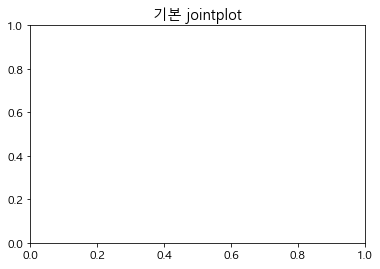

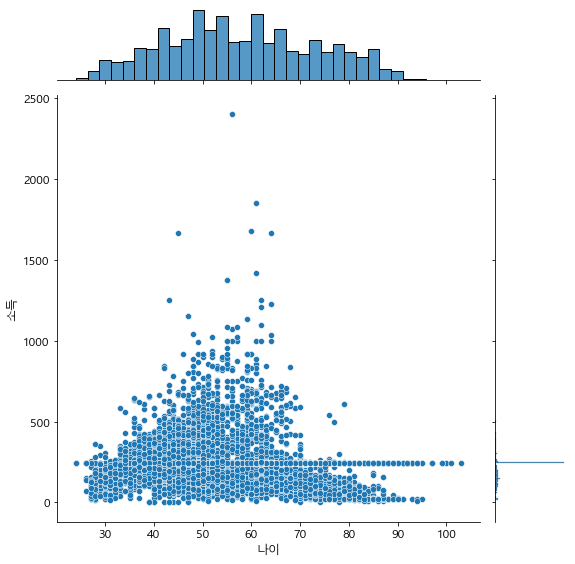

In [33]:
# 디폴드 값
plt.figure()
plt.title('기본 jointplot')
sns.jointplot(x='나이', y='소득', height=8, data=welfare)  

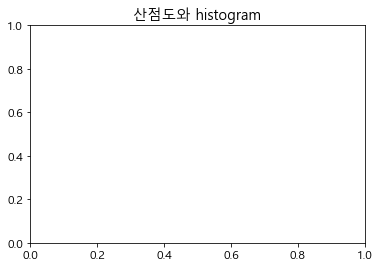

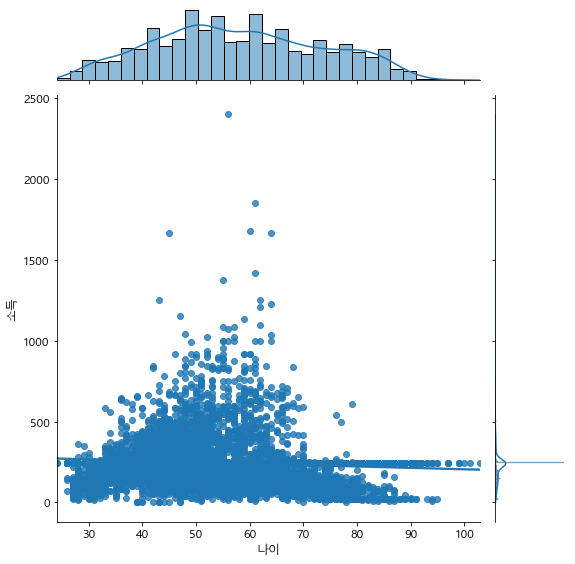

In [34]:
# kind="reg" : 선형 회귀선 KDE 추가해서 <선형 관계> 확인
plt.figure()
plt.title('산점도와 histogram')
sns.jointplot(x='나이', y='소득', height=8, data=welfare, kind="reg")  

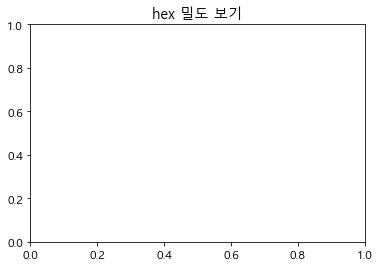

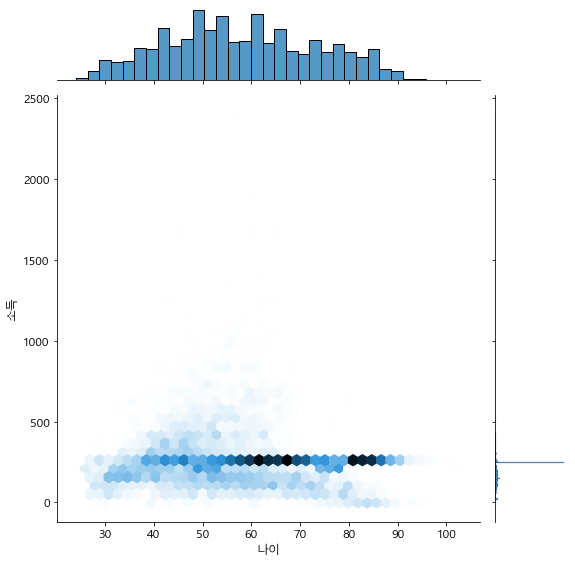

In [35]:
# kind="hex" : 육각형 모양의 <밀도> 확인
plt.figure()
plt.title('hex 밀도 보기')
sns.jointplot(x='나이', y='소득', height=8, data=welfare, kind="hex")

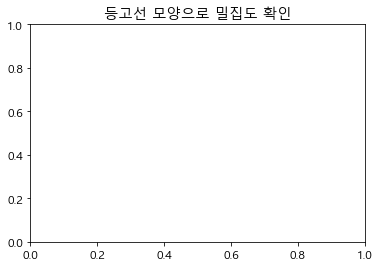

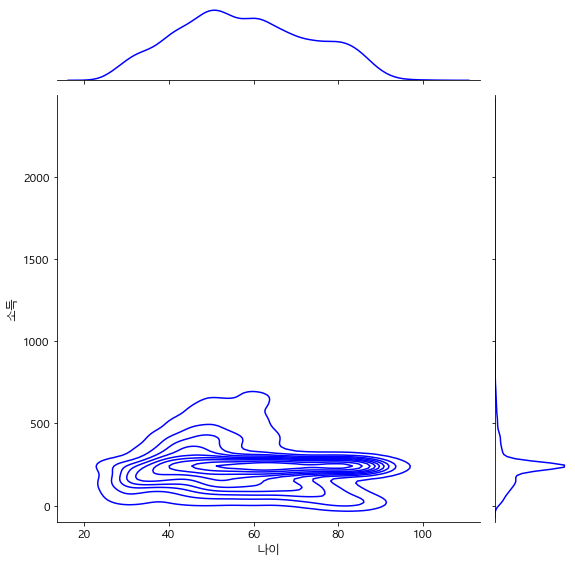

In [36]:
# kind="kde" : 등고선 모양으로 <밀집>도 확인
plt.figure()
plt.title('등고선 모양으로 밀집도 확인')
sns.jointplot(x='나이', y='소득', height=8, data=welfare, kind="kde", color="b")

## 성별에 따른 소득 그래프(barplot 이용)

Text(0, 0.5, '소득')

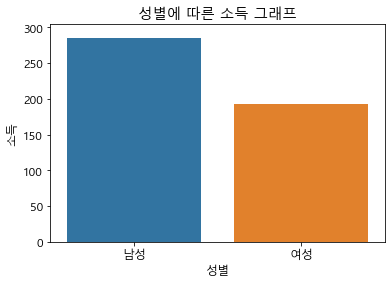

In [37]:
# 소득, 성별 컬럼에 대한 간략한 통계치 정보 확인 => x축에는 '성별' 컬럼의 목록, y축에는 '소득' 컬러의 평균값
ax = plt.subplots()
ax = sns.barplot(x='성별',y='소득', data=welfare, errwidth=0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
#FileSave()

Text(0, 0.5, '소득')

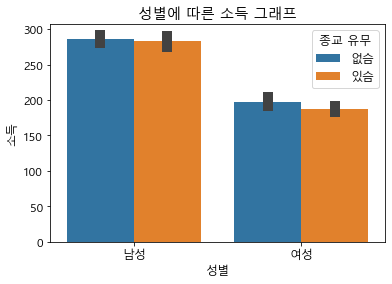

In [47]:
# hue 매개변수 사용하여 종교 유무에 따른 색상 구분 & 다변량 막대그래프 보임
ax = plt.subplots()
ax = sns.barplot(x='성별',y='소득', hue='종교 유무', data=welfare, errwidth=10)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

Text(0, 0.5, '소득')

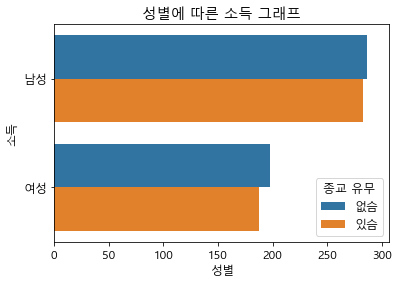

In [39]:
# 매개 변수 x와 y를 서로 맞바꿔 <가로 막대그래프> 그리기.   가로막대그래프가 그려지는 이유: 성별은 평균을 낼수 없다
ax = plt.subplots()
ax = sns.barplot(x='소득',y='성별', hue='종교 유무', data=welfare, errwidth=0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

## 성별에 따른 소득 상자 수염 그래프(boxplot)

Text(0, 0.5, '소득')

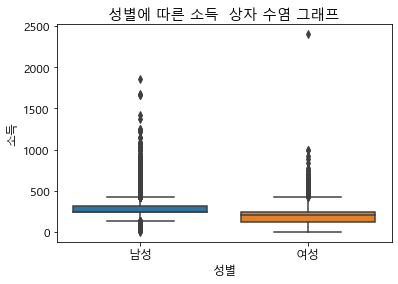

In [40]:
# 이상치가 많은게 보임
ax = plt.subplots()
ax = sns.boxplot(x='성별',y='소득', data=welfare)
ax.set_title('성별에 따른 소득  상자 수염 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

Text(0, 0.5, '소득')

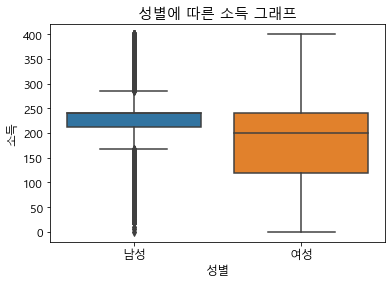

In [41]:
# 이상치가 많이 제거된 그래프
newwelfare = welfare.loc[ welfare['소득'] <= 400 ]  # 이상치 제거

ax = plt.subplots()
ax = sns.boxplot(x='성별',y='소득', data=newwelfare)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')

## 소득에 따른 나이 (이차원 밀집도_kdeplot)

Text(0, 0.5, '나이')

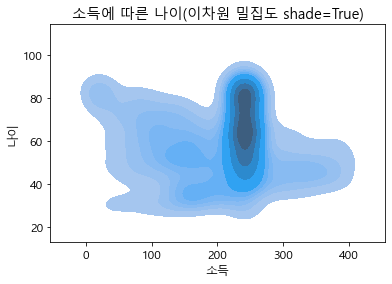

In [42]:
# 소득에 따른 나이를 이용하여 이차원 밀집도 그래프를 그린다.
kde, ax = plt.subplots()   # 얘는 왜 쓰는지 모르겠음
ax = sns.kdeplot(data=newwelfare['소득'], 
                data2=newwelfare['나이'],
                shade=True)   # 그림자 효과 지정

ax.set_title('소득에 따른 나이(이차원 밀집도 shade=True)')
ax.set_xlabel('소득')
ax.set_ylabel('나이')

Text(0, 0.5, '나이')

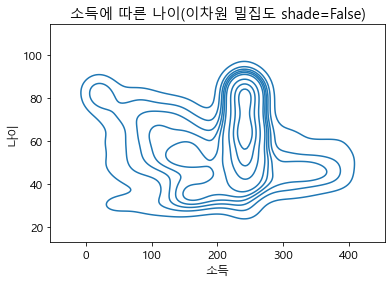

In [43]:
#shade를 False로 지정 
kde, ax = plt.subplots()
ax = sns.kdeplot(data=newwelfare['소득'], 
                data2=newwelfare['나이'],
                shade=False)   # 그림자 효과 지정

ax.set_title('소득에 따른 나이(이차원 밀집도 shade=False)')
ax.set_xlabel('소득')
ax.set_ylabel('나이')